# Homework 6.
made by German Ilya

## **Part1.**

##### Assignment 1.

Choose proteins from [UniProt](https://www.uniprot.org/uniprotkb?query=%2AHUMAN).
- KR124_HUMAN (KRTAP12-4)
- IL17F_HUMAN (IL17F)
- LENG1_HUMAN (LENG1)
- EPGN_HUMAN (EPGN)
- CS012_HUMAN (C19orf12)
- CS044_HUMAN (C19orf44)
- CS047_HUMAN (C19orf47)
- CS018_HUMAN (C19orf18)
- CS067_HUMAN (C19orf67)
- CS073_HUMAN (C19orf73)

Find orthologs by using [NCBI database](https://www.ncbi.nlm.nih.gov/gene/). Choose chimpanzee.

- [KRTAP12-4 human](https://www.ncbi.nlm.nih.gov/gene/386684/) and [KRTAP12-4 chimp](https://www.ncbi.nlm.nih.gov/gene/738964/)
- [IL17F human](https://www.ncbi.nlm.nih.gov/gene/112744/) and [IL17F chimp](https://www.ncbi.nlm.nih.gov/gene/472030/)
- [LENG1 human](https://www.ncbi.nlm.nih.gov/gene/79165/) and [LENG1 chimp](https://www.ncbi.nlm.nih.gov/gene/107969801/)
- [EPGN human](https://www.ncbi.nlm.nih.gov/gene/255324/) and [EPGN chimp](https://www.ncbi.nlm.nih.gov/gene/461252/)
- [C19orf12 human](https://www.ncbi.nlm.nih.gov/gene/83636/) and [C19H19orf12 chimp](https://www.ncbi.nlm.nih.gov/gene/455913/)
- [C19orf44 human](https://www.ncbi.nlm.nih.gov/gene/84167/) and [C19H19orf44 chimp](https://www.ncbi.nlm.nih.gov/gene/455811/)
- [C19orf47 human](https://www.ncbi.nlm.nih.gov/gene/126526/) and [C19H19orf47 chimp](https://www.ncbi.nlm.nih.gov/gene/100991452/)
- [C19orf18 human](https://www.ncbi.nlm.nih.gov/gene/147685/) and [C19H19orf18 chimp](https://www.ncbi.nlm.nih.gov/gene/741785/)
- [C19orf67 human](https://www.ncbi.nlm.nih.gov/gene/646457/) and [C19H19orf67 chimp](https://www.ncbi.nlm.nih.gov/gene/747537/)
- [C19orf73 human](https://www.ncbi.nlm.nih.gov/gene/55150/) and [C19H19orf73 chimp](https://www.ncbi.nlm.nih.gov/gene/747945/)


Download all data and extract files `gene.fna` into one directory. Then run a script (I made it because it is too difficult to do so many operations by your own and didn't make a mistake). Script takes one argument `filename`, reads sequences from this file and writes the only first sequence in another file. So, we prepare data for alignment on site [EMBL-EBI](https://www.ebi.ac.uk/Tools/psa/emboss_needle/).

After pair alignment we get an indentity and similarity.
List of values:

| Protein | Identity | Similarity |
|---------|----------|------------|
| KRTAP12-4 | 45% | 45% |
| IL17F | 96.5% | 96.5% |
| LENG1 | 77.1% | 77.1% |
| EPGN | 73.5% | 73.5% |
| C19orf12 | 69.1% | 69.1% |
| C19orf18 | 84.4% | 84.4% |
| C19orf44 | ? | ? |
| C19orf47 | ? | ? |
| C19orf67 | 51.5% | 51.5% |
| C19orf73 | 76.9% | 76.9% |

Twice we get an error and EMBL-EBI site cannot align the sequences. Screenshots of result are [here](https://github.com/ilyagerman52/bioinformatics/tree/main/homework6/Part1/Assignment1).

Count mean values of identity and similaryty:
$\text{Mean identity} = \cfrac{1}{8}\left(45\% + 96\% + 77.1\% + 73.5\% + 69.1\% + 84.4\% + 51.5\% + 76.9\%\right) = 71.7\%$
Due to identity is equal to similarity in this case, the mean value of similarity is $71.7\%$ too. 

##### Assignment 2.*


First of all download a human genome from [NCBI database](https://www.ncbi.nlm.nih.gov/data-hub/taxonomy/9606/) and load it in working directory. Extract it and rename.

In [1]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz # -q
!gunzip GCF_000001405.40_GRCh38.p14_genomic.fna.gz
!mv GCF_000001405.40_GRCh38.p14_genomic.fna human_genome.fna

--2023-05-14 20:42:12--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 972898531 (928M) [application/x-gzip]
Saving to: ‘GCF_000001405.40_GRCh38.p14_genomic.fna.gz’

GCF_000001405.40_GR 100%[===================>] 927.83M  70.9MB/s    in 13s     

2023-05-14 20:42:25 (73.0 MB/s) - ‘GCF_000001405.40_GRCh38.p14_genomic.fna.gz’ saved [972898531/972898531]



Then use next script for generating random subsequences by with length 100.
The file contains too many rows, so read and maintain all of in in REM is not possible. So, we cannot generate it honestly. Another problem is that file contains regions of genome, where is no A, T, G or C (for example only N, or rows with names of sequences). So, we will use the next idea of algorithm:
- Using `readline()` we will read all file, and count the number of rows (it is about $4.1 \cdot 10^8$).
- Then generate $k + p$ different numbers, where $k$ is eual to $100$ - the number of required subsequences and $p$ is oversampling.
- The will read file by readline again. Now, when we are on the row, which number is in generated array, we will save it and supplement by $20$ letters from next row (here we uses that `.fasta` files contains rows with $80$ nucleotides).
- Then save from received dictionary only rows, that have format: $80$ letter + `\n`-symbol + $20$ letters.
- Using oversampling afford us to randomize $k$ from remaining subsequebces and write them to the file.

Using this algorythm afford us to maintain uniform distribution between different parts of genome and remove outliers.

In [2]:
# Be careful! The script takes quite a long time to run.

import random
random.seed(123)
import re

line_count = sum(1 for line in open('human_genome.fna', "r"))

random_choice = []
for i in range(125):
    random_choice.append(random.randint(0, line_count))

chosen_lines = dict()
line_now = 0
next_20 = -1
with open("human_genome.fna", "r") as genome_file:
    while True:
        line = genome_file.readline()
        if next_20 != -1:
            chosen_lines[next_20] += line[:20]
        if line_now in random_choice:
            next_20 = line_now
            chosen_lines[line_now] = line
        else:
            next_20 = -1
        line_now += 1
        if line_now == line_count:
            break
subseqs_oversampled = []
for value in chosen_lines.values():
    if bool(re.fullmatch("^[ATGCatgc\n]+$", value)):
        subseqs_oversampled.append(value)
subseqs = random.sample(subseqs_oversampled, 100)
with open("subseq_py.fasta", "w") as subseq_py_file:
    for i, seq in enumerate(subseqs):
        subseq_py_file.write(">subseq_"+str(i) + "\n")
        subseq_py_file.write(seq)
        subseq_py_file.write("\n")

We can check that generated file `subseq_py.fasta` is exatly what we need.

In [3]:
!head -n9 subseq_py.fasta # 3 lines for each subsequence
print('...')
!tail -n9 subseq_py.fasta

>subseq_0
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctttgtagatt
>subseq_1
TTTCTACTCAACCTTATAGTAGTCTATCAATTTATTAGGtcctgggtaaaaaaaaaaaaattagaaaccaatGCACAATG
CTAATAACTGTGAGATAACT
>subseq_2
actttttaaaacttatttaataaattatttcagacaaaacaatcCCCTGATAATTTTTCCAACAATAGTTTCATGAAGTT
AGTTTTTAAATGTGATGTGG
...
>subseq_97
acactcttcttttggaatctgcaagtggatatttggatagatttgaggatttcgttggaaacgggattatatatcaaaag
tagacagcagcattctcaga
>subseq_98
CccaattctttaatttttgtcttaCCTTCATAAAGAATAAGCAAGTTATGTGCAGTGTGTTTTGACTTATACAAAATGTT
ATCATTTTTCACAGGTTTTA
>subseq_99
GCTGGGCCAGGCTCCCTGACAGCCCCACTGTGTGGTTGCCCAAGCAGGAAGGTGGACGTGAGCTCCATCTCGATGGGTGA
GGCTTTGGGATGCTGGACTT


Install `Bio`-library using `pip`.

In [4]:
!pip install Bio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.1 MB/s eta 0:00:00


After installing `Bio` we will run next script. This script imports tools for working with BLAST and find orthologies, counting average values of identity and similarity.

This methods afford us to get most similar parts of genome Pan troglodytes using NCBI BLAST.

In [5]:
# Be careful! The script takes quite a long time to run.

from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

result_handle = NCBIWWW.qblast(
    "blastn",
    "nt",
    open("subseq_py.fasta").read(),
    entrez_query="Pan troglodytes[Organism]",
    expect=1e-3,
    hitlist_size=10
)
identities = []
blast_records = NCBIXML.parse(result_handle)
for blast_record in blast_records:
    if len(blast_record.alignments) >= 1:
        alignment = blast_record.alignments[0]
        if len(alignment.hsps) >= 1:
            hsp = alignment.hsps[0]
            identity = 100.0 * hsp.identities / hsp.align_length
            identities.append(identity)
mean_identity = sum(identities) / len(identities)
print("Average identity:", mean_identity)

Average identity: 93.35609774743777


## **Part2.**

##### Assignment 1.

###### Question 0.

**a)** After 10 steps of PCR the percentage of molecules belonging to the test organism will be $\cfrac{2 \cdot 2^{10}}{2 \cdot 2^{10} + 3} \simeq 99.85\% $

**b)** The same things with 40 steps:
$\cfrac{2 \cdot 2^{40}}{(2 + 3) \cdot 2^{40}} = 40\%$ 


I don't know exactly what way is correct, but now i garanteered 0.25 score for two points.

###### Question 1.


**answer:** It is more likely that Иванов is culprit of contamination

**explanation:** We use BLAST for finding somewhat similar sequences. Set parameters:
- upload file: 11.fasta (Downloaded from disk or from [here](https://github.com/ilyagerman52/bioinformatics/tree/main/Part2/Assignment1/11.fasta))Felis catus (taxid:9685)
- exclude Models (XM/XP)
- optimize for: somewhat similar sequences
- Algorithm parameters -> Max matches in a query range: $1$

[screenshots](https://github.com/ilyagerman52/bioinformatics/tree/main/Part2)

With these parameters we can download `Text`-results. For each read we gets only one organism. (I uploaded result to [github](https://github.com/ilyagerman52/bioinformatics)).

To watch results, we need to prepare it.

Before answer on this question we need to do question 2.


###### Question 2.

For researching species, download `Text` format results from BLAST. (I uploaded it into github, so now we can use `wget`.) Then watch, and note, that all reads according to one species of dogs, and one - of cats.

In [6]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment1/text_results.txt -O question1_text_results.txt -q

In [7]:
!cat question1_text_results.txt | grep 'Canis'
print('-'*100)
!cat question1_text_results.txt | grep 'Felis'

Canis lupus genome assembly, chromosome: 25                       Canis lupus     gray wolf       9612       123    123   100%  1e-23 87.00  53617450   HG994404.1       
>Canis lupus genome assembly, chromosome: 25
Canis lupus genome assembly, chromosome: 25                       Canis lupus     gray wolf       9612       141    141   100%  4e-29 91.00  53617450   HG994404.1       
>Canis lupus genome assembly, chromosome: 25
Canis lupus genome assembly, chromosome: 24                       Canis lupus     gray wolf       9612       81.5   81.5  100%  3e-11 79.21  49877449   HG994407.1       
>Canis lupus genome assembly, chromosome: 24
Canis lupus genome assembly, chromosome: 25                       Canis lupus     gray wolf       9612       133    133   95%   6e-27 92.63  53617450   HG994404.1       
>Canis lupus genome assembly, chromosome: 25
Canis lupus genome assembly, chromosome: 24                       Canis lupus     gray wolf       9612       126    126   97%   9e-25 88.66 

Find all names of organisms:

In [8]:
species = dict()
with open("question1_text_results.txt", "r") as question1_text_results:
    line = question1_text_results.readline()
    next_good = False
    while line:
        if next_good:
            name = line[82:98]
            if name in species.keys():
                species[name] += 1
            else:
                species[name] = 1
        next_good = True if 'Name' in line else False
        line = question1_text_results.readline()

Create a diagram.

In [9]:
import plotly.express as px

values = species.values()
labels = species.keys()
fig = px.pie(values=values, names=labels)
fig.update_layout(
    title='Distibution between species in contamination',
    font=dict(size=16)
)
fig.show()


This distribution entails that contamination is more likely by Иванов, because gemones of gray wolf and reitriever Labrador is quite similar.
If limit orgenism only by Felis catus and Canis lupus familiaris, the dogs was get absolute advandage (53 reads vs 6 reads aligned to cats).
Consequently, we can say that more likely, that Ivanov is culprit of contamination. But also we can see lot's of different species such as killer whales, flies, common pipis..., etc. This may be caused by inaccuracy in the experiment. 

###### Question 3.

For calculating the most frequent species in top-10, we set the parameter `Max matches in a query range` equal to 10. And remove limitations on organisms.
Then download results.

In [10]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment1/question3.txt -O question3_text_results.txt -q

In [11]:
import plotly.express as px

species = dict()
with open("question3_text_results.txt", "r") as question3_text_results:
    line = question3_text_results.readline()
    next_good = False
    while line:
        if next_good:
            name = line[82:98]
            if name in species.keys():
                species[name] += 1
            else:
                species[name] = 1
        next_good = True if 'Name' in line else False
        line = question3_text_results.readline()

values = species.values()
labels = species.keys()
fig = px.pie(values=values, names=labels)
fig.update_layout(
    title='Distibution between species in contamination',
    font=dict(size=16)
)
fig.show()


The result blew my mind. Here we see that domestic cat and fishing cat have above 12% for together. It is much greater then 4% dog. 

##### Assignment 2. DNA fragmentation.

We must shoose random sequence from human genome.
But we have already do it in  the first part of HW, so we only need to copy one of subsequences:

In [12]:
!echo ">fragment_100" > fragments.fasta
!head -n3 subseq_py.fasta | tail -n2 >> fragments.fasta
!cat fragments.fasta

>fragment_100
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctttgtagatt


In [13]:
with open("fragments.fasta", "r") as fragments:
    _ = fragments.readline()
    all_seq = fragments.read()

with open ('fragments_2.fasta', 'w') as fragments:
    for length in range(100, 0, -1):
        fragments.write(">fragment_" + str(length)+'\n')
        if length > 80:
            fragments.write(all_seq[:length + 1]+'\n')
        else:
            fragments.write(all_seq[:length]+'\n')
!rm fragments.fasta
!mv fragments_2.fasta fragments.fasta
!cat fragments.fasta

>fragment_100
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctttgtagatt
>fragment_99
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctttgtagat
>fragment_98
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctttgtaga
>fragment_97
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctttgtag
>fragment_96
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctttgta
>fragment_95
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctttgt
>fragment_94
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctttg
>fragment_93
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttcttt
>fragment_92
aatgtcttcttttgagaagtgtctgttcatatccttcgcccactttgtgatggggttgtttgtttttttcttgtaaattt
gtttgagttctt


**a)** Now download this file and load it in BLAST. Set `Max matches in a query range` is equal to $1$. Then download file (github). There we can see the last row with fragment_25. Consequently, fragments with length less the 25 is not appropriate for $\text{e-value} = 0.05$. [screenshots](https://github.com/ilyagerman52/bioibformatics/tree/main/homework6/Part2/Assignment2/Screenshots)

In [14]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment2/results.csv -O fragment_results.csv -q

In [15]:
import pandas as pd

fragment_results = pd.read_csv("fragment_results.csv", header=None)
fragment_results

,0,1,2,3,4,5,6,7,8,9,10,11
0,fragment_100,AL360015.25,100.0,100,0,0,1,100,9052,8953,1.330000e-41,181.0
1,fragment_99,AL360015.25,100.0,99,0,0,1,99,9052,8954,4.570000e-41,179.0
2,fragment_98,AL360015.25,100.0,98,0,0,1,98,9052,8955,1.570000e-40,178.0
3,fragment_97,AL360015.25,100.0,97,0,0,1,97,9052,8956,5.380000e-40,176.0
4,fragment_96,AL360015.25,100.0,96,0,0,1,96,9052,8957,1.850000e-39,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,fragment_29,X01574.1,100.0,29,0,0,1,29,1296,1324,2.210000e-04,53.6
72,fragment_28,X01574.1,100.0,28,0,0,1,28,1296,1323,7.720000e-04,51.8
73,fragment_27,X01574.1,100.0,27,0,0,1,27,1296,1322,3.000000e-03,50.0
74,fragment_26,X01574.1,100.0,26,0,0,1,26,1296,1321,9.000000e-03,48.2


**b)** If we set limitations as only human(taxis:9606) organism and do the same thing, we will get table with fragments with length $100 - 21$. It means that fragments with length less then $21$ have $\text{e-value} > 0.05$. In this case we faced with decreasing minimal length for limitation $\text{e-value} <= 0.05$. It follows from the decriesing number of alignments according to fixed organism.

In [16]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment2/only_human_results.csv -O fragment_only_human_results.csv -q

In [17]:
fragment_only_human_results = pd.read_csv("fragment_only_human_results.csv", header=None)
fragment_only_human_results

,0,1,2,3,4,5,6,7,8,9,10,11
0,fragment_100,AL360015.25,100.0,100,0,0,1,100,9052,8953,1.310000e-43,181.0
1,fragment_99,AL360015.25,100.0,99,0,0,1,99,9052,8954,4.510000e-43,179.0
2,fragment_98,AL360015.25,100.0,98,0,0,1,98,9052,8955,1.550000e-42,178.0
3,fragment_97,AL360015.25,100.0,97,0,0,1,97,9052,8956,5.330000e-42,176.0
4,fragment_96,AL360015.25,100.0,96,0,0,1,96,9052,8957,1.830000e-41,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,fragment_25,X01574.1,100.0,25,0,0,1,25,1296,1320,2.960000e-04,46.4
76,fragment_24,X01574.1,100.0,24,0,0,1,24,1296,1319,1.000000e-03,44.6
77,fragment_23,X01574.1,100.0,23,0,0,1,23,1296,1318,4.000000e-03,42.8
78,fragment_22,X01574.1,100.0,22,0,0,1,22,1296,1317,1.300000e-02,41.0


**graphics)** Downloaded tables are [here](https://github.com/ilyagerman52/bioinformatics/tree/main/homework6/Part2/Assignment2).

In [18]:
from math import log

length = fragment_only_human_results[3].tolist()
identities = fragment_only_human_results[2].tolist()
evalue = fragment_only_human_results[10].tolist()
log_evalue = list(map(lambda x: log(x), evalue))

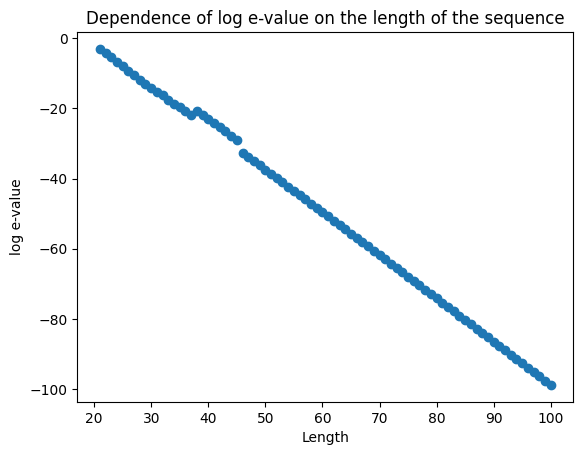

In [19]:
import matplotlib.pyplot as plt

plt.scatter(length, log_evalue)
plt.title('Dependence of log e-value on the length of the sequence')
plt.xlabel('Length')
plt.ylabel('log e-value')
plt.show()

To tell the truth, I have no idea, why part of scatter is a bit higher, but it is admissible to say, that we get line-dependence. (Consequently exponent dependence between e-value and length)

To create maxN dependence, we need to use BLAST without limitation in algorithm parameter. So, run BLAST with `Max matches in a query range` equal to $10$ (I tried 0, but the file in that case is too big and it's difficult to work with it, while the true value of identities is the same only about 3 rows).

In [20]:
!wget https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment2/result_all.csv -O fragment_result_all.csv

--2023-05-14 20:46:05--  https://github.com/ilyagerman52/bioinformatics/raw/main/homework6/Part2/Assignment2/result_all.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ilyagerman52/bioinformatics/main/homework6/Part2/Assignment2/result_all.csv [following]
--2023-05-14 20:46:05--  https://raw.githubusercontent.com/ilyagerman52/bioinformatics/main/homework6/Part2/Assignment2/result_all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70102 (68K) [text/plain]
Saving to: ‘fragment_result_all.csv’

fragment_result_all 100%[===================>]  68.46K  --.-KB/s    in 0.01s   

2023-05-14 20:4

In [21]:
result_all = pd.read_csv("fragment_result_all.csv", header=None)
result_all.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11
1020,fragment_22,K01241.1,100.0,22,0,0,1,22,2210,2189,0.014,41.0
1021,fragment_22,K02402.1,100.0,22,0,0,1,22,1141,1120,0.014,41.0
1022,fragment_22,M22334.1,100.0,22,0,0,1,22,1354,1333,0.014,41.0
1023,fragment_22,M22333.1,100.0,22,0,0,1,22,3007,2986,0.014,41.0
1024,fragment_22,M69297.1,100.0,22,0,0,1,22,1529,1508,0.014,41.0
1025,fragment_22,M64554.1,100.0,22,0,0,1,22,22757,22778,0.014,41.0
1026,fragment_22,X01574.1,100.0,22,0,0,1,22,1296,1317,0.014,41.0
1027,fragment_21,L11910.1,100.0,21,0,0,1,21,79323,79343,0.047,39.2
1028,fragment_21,L11910.1,100.0,21,0,0,1,21,118543,118523,0.047,39.2
1029,fragment_21,L11910.1,100.0,21,0,0,1,21,167788,167768,0.047,39.2


I have no time to continue, the last graphic must be the constant line with $\text{maxN} = 3$. 